<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Python_Tree_Based_Methods_for_Logistic_Regression_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Model Performance:
Accuracy: 0.95

Classification Report:

              precision    recall  f1-score   support

   malignant       0.94      0.94      0.94        63
      benign       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



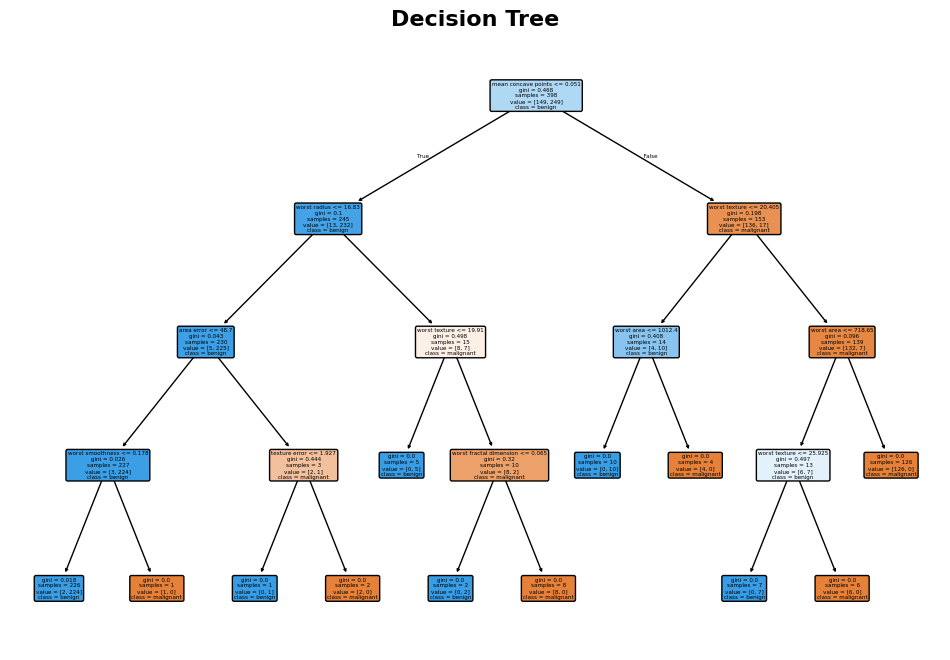

Random Forest Model Performance:
Accuracy: 0.96

Classification Report:

              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



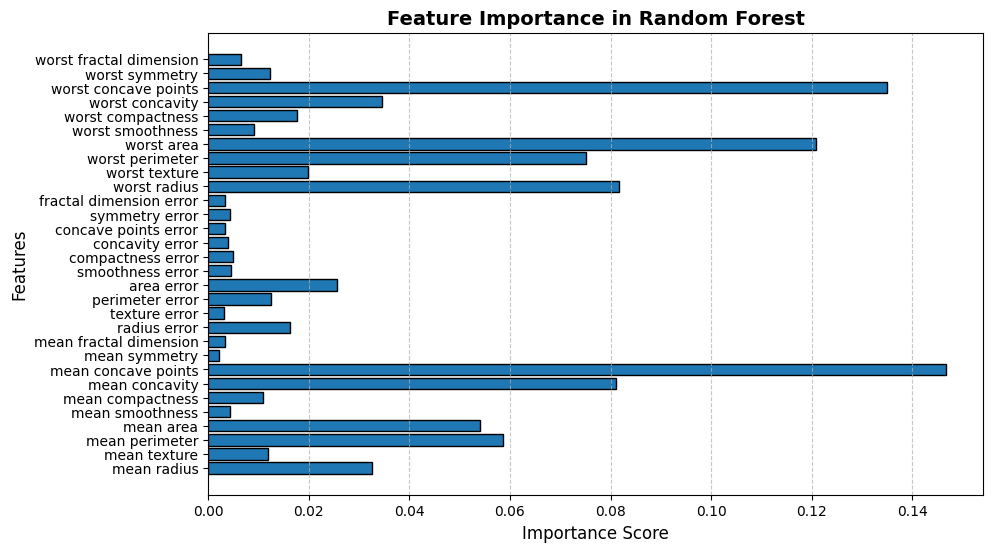

Gradient Boosting Model Performance:
Accuracy: 0.96

Classification Report:

              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



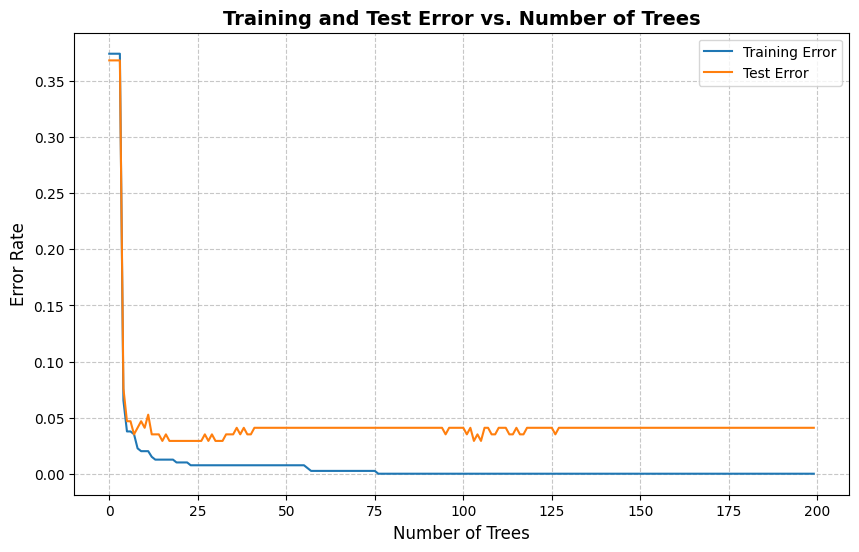

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Load and preprocess data
# I chose the Breast Cancer dataset from sklearn as a binary classification problem.
# This dataset mimics scenarios like predicting binary outcomes, making it suitable for logistic regression modeling.
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Decision Tree Classifier
# I started with a decision tree to establish a baseline performance for binary classification.
# This model allowed me to understand how a single tree performs and identify potential overfitting.
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predict with the decision tree model
y_dt_pred = dt_model.predict(X_test)

# Evaluate the decision tree model
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_dt_pred):.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_dt_pred, target_names=data.target_names))

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree", fontsize=16, fontweight="bold")
plt.show()

# Step 3: Random Forest Classifier
# To reduce variance and improve performance, I applied Random Forest, which builds multiple trees and averages their predictions.
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict with the Random Forest model
y_rf_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_rf_pred):.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_rf_pred, target_names=data.target_names))

# Analyze feature importance in Random Forest
feature_importances = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(data.feature_names, feature_importances, color="#1f77b4", edgecolor="black")
plt.title("Feature Importance in Random Forest", fontsize=14, fontweight="bold")
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Step 4: Gradient Boosting Classifier
# Gradient Boosting builds trees sequentially, with each tree correcting the errors of the previous ones.
# This approach often provides excellent predictive performance for binary classification.
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predict with the Gradient Boosting model
y_gb_pred = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
print("Gradient Boosting Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_gb_pred):.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_gb_pred, target_names=data.target_names))

# Visualize training and test error vs. number of estimators
training_errors = []
test_errors = []
for y_train_pred, y_test_pred in zip(
    gb_model.staged_predict(X_train), gb_model.staged_predict(X_test)
):
    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(training_errors, label="Training Error")
plt.plot(test_errors, label="Test Error")
plt.title("Training and Test Error vs. Number of Trees", fontsize=14, fontweight="bold")
plt.xlabel("Number of Trees", fontsize=12)
plt.ylabel("Error Rate", fontsize=12)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# Final Interpretation:
# Decision trees provided a simple yet interpretable baseline but were prone to overfitting.
# Random Forest improved performance by reducing variance through averaging multiple trees.
# Gradient Boosting achieved the best predictive accuracy by sequentially correcting errors, at the cost of increased sensitivity to parameter tuning.
# Feature importance analysis highlighted the most influential variables, enhancing interpretability across all models.
# These tree-based methods offered a robust framework for improving binary classification tasks, particularly in handling complex relationships and interactions between features.
